# Electrical Fault detection and classification

Nuestra base de datos nos da la información sobre 3 líneas con su respectiva corriente y 3 fuentes de energía sobre un sistema electrónico. A partir de esta información, tenemos dos tipos de problemas de clasificación: <br>

    1. Detectar si hay un fallo en el sistema eléctrico.
    2. Clasificar que tipo de falla hay en el sistema eléctrico.

En este <b>Notebook</b>, llevaremos a cabo el primer punto, que sería realizar un modelo que pueda predecir si hay fallo o no.

Importamos `pandas` y `numpy` para poder leer y trabajar el Dataset. <br>
Y cargamos el dataset con datos para detectar si un sistema de energia tiene fallas o no, en este caso [`detect_dataset.csv`](https://www.kaggle.com/esathyaprakash/electrical-fault-detection-and-classification?select=detect_dataset.csv)

In [22]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('../data/detect_dataset.csv')
n_classes = 2

dataset.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


De los anteriores datos, nuestro target es el <b>Output (S)</b>. <br>
Esta siendo un 0 o 1. Con lo cual es un problema logístico o de clasificación. <br>
Y los demás siendo features, en este caso nos interesan todos, ja todas nos aportan información sobre el sistema eléctrico.

# Exploratory data analysis


In [23]:
dataset.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

Un poco de limpieza para eliminar los nullos. <br>
Como podemos ver, tenemos 2 columnas que están totalmente vacías.

In [24]:
dataset = dataset.drop(['Unnamed: 7','Unnamed: 8'], axis = 1)
dataset

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [25]:
dataset.isnull().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

<b>Seperamos las variables dependientes y las independientes, en Y y X respectivamente.<b>

In [26]:
Y = dataset.values[:,0]

X = dataset.values[:,1:]

<AxesSubplot:>

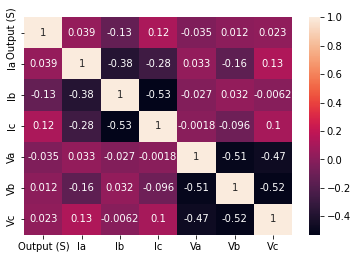

In [27]:
import seaborn as sns

sns.heatmap(dataset.corr(), annot = True)

Como podemos ver no hay una gran correlación en los datos. <br>
Pero se puede apreciar que hay una pequeña correlación entre las fuentes de energia y líneas, pero entre líneas ni fuentes hay correlación.

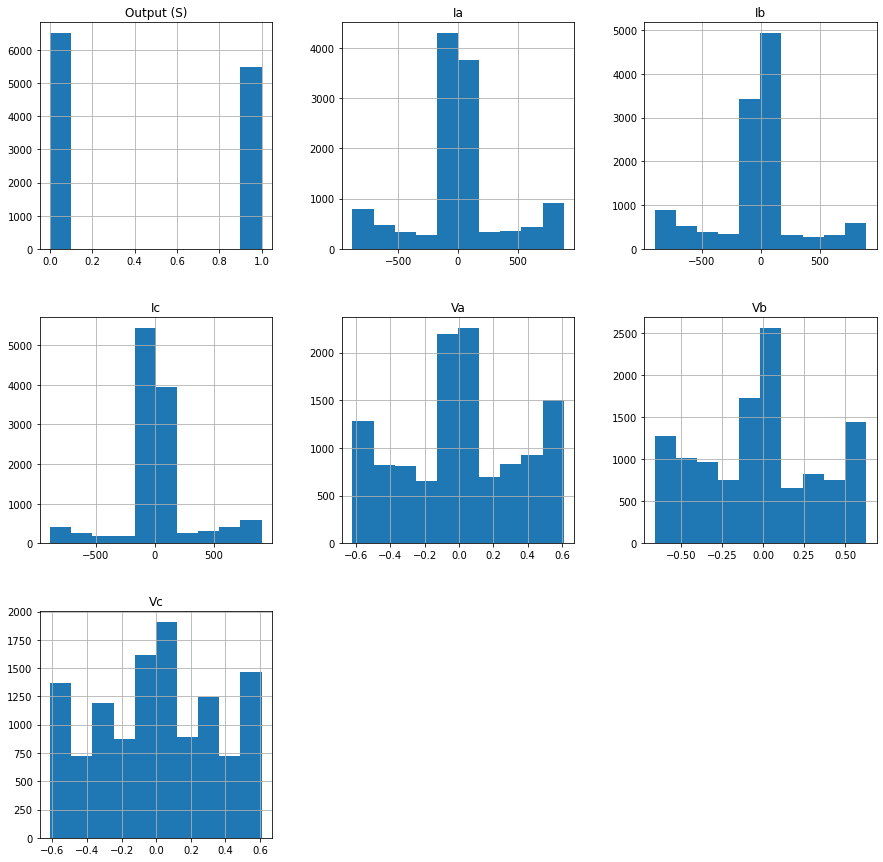

In [28]:
hist = dataset.hist(figsize = (15, 15))


Además se puede ver que los datos tiene una distribución gaussiana.

In [29]:
dataset.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [30]:
dataset.Va.groupby(Y).count()

0.0    6505
1.0    5496
Name: Va, dtype: int64

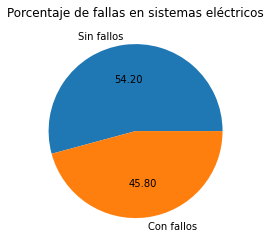

In [31]:
import matplotlib.pyplot as plt

plt.title("Porcentaje de fallas en sistemas eléctricos")
pie = plt.pie(dataset.Va.groupby(Y).count(), labels= ['Sin fallos', 'Con fallos'], autopct = '%.2f')


Con esto podemos ver que nuestro `dataset` está <b>balanceado</b>, ya que no hay una gran diferencia de datos entre ambas categorías.

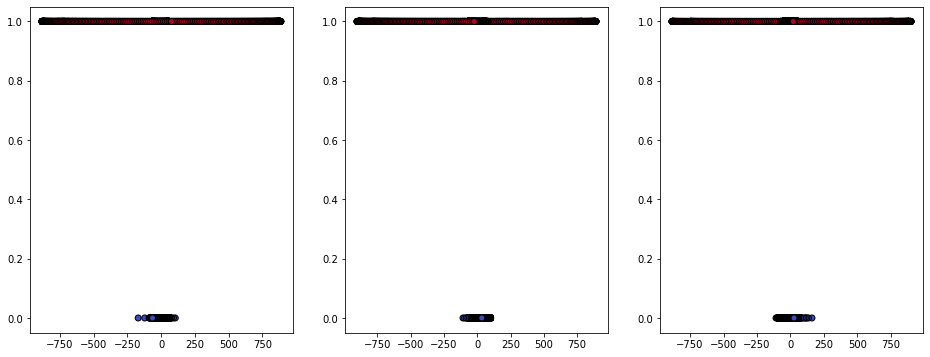

In [32]:
fig, sub = plt.subplots(1, 3, figsize=(16, 6))
sub[0].scatter(X[:,0], Y, c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], Y, c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[2].scatter(X[:,2], Y, c=Y, cmap=plt.cm.coolwarm, edgecolors='k')

Se puede ver un poco a partir de esta gráfica, los rangos de los valores de las líneas de corrientes cuando hay una falla y cuando no la hay. Podemos observar claramente los rangos cuando <b>no hay fallas </b>, están limitas entre -250 y 250.

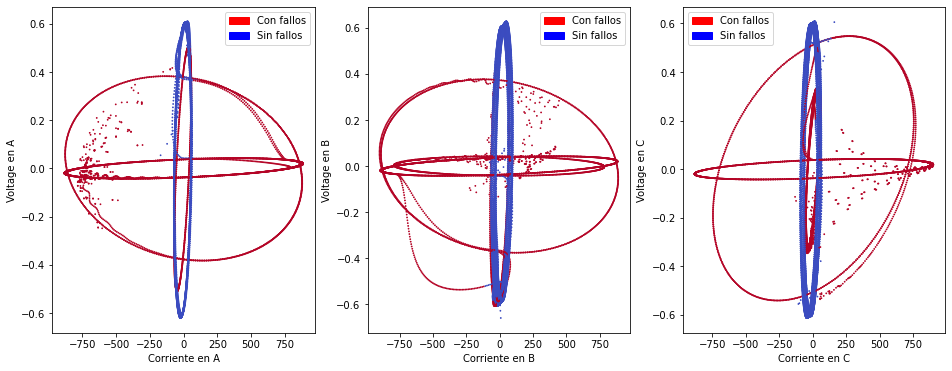

In [33]:
import matplotlib.patches as mpatches
def draw_volatege_per_current(X, Y):    
    red_patch = mpatches.Patch(color='red', label='Con fallos')
    blue_patch = mpatches.Patch(color='blue', label='Sin fallos')
    fig, sub = plt.subplots(1, 3, figsize=(16, 6))
    lines = ['A', 'B', 'C']
    
    
    sub[0].scatter(X[:,0], X[:,3], c=Y, cmap=plt.cm.coolwarm, s = .6)
    sub[1].scatter(X[:,1], X[:,4], c=Y, cmap=plt.cm.coolwarm, s = .6)
    sub[2].scatter(X[:,2], X[:,5], c=Y, cmap=plt.cm.coolwarm, s = .6)
    for i in range(3):
        sub[i].set_xlabel('Corriente en '+ lines[i])
        sub[i].set_ylabel('Voltage en '+ lines[i])
        sub[i].legend(handles = [red_patch, blue_patch])
        
draw_volatege_per_current(X,Y)

En los gráficos anteriores, se puede ver las 3 distintas fuentes de energía con sus líneas de corriente, podemos ver que claramente hay un patrón, cuando sucede un error y cuando no.

# Preprocessing

In [34]:
from sklearn.decomposition import PCA

def reduce_dimensions(X, n_dim):
    pca = PCA(n_components = n_dim)    
    new_X = pca.fit_transform(X)
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.cumsum())

    return new_X

Para poder visualizar mejor los resultados, vamos a realizar un PCA sobre nuestras features, actualmente son 6, y vamos a dejarlos en 2D, además cada vez que vayamos a reducir las dimensiones.<br> 
Además nos interesa imprimir el [ratio de la varianza](https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff), que lo veremos en un futuro a la hora de escoger con que datos entrenar nuestro modelo de clasificación.


### Standard Scaler

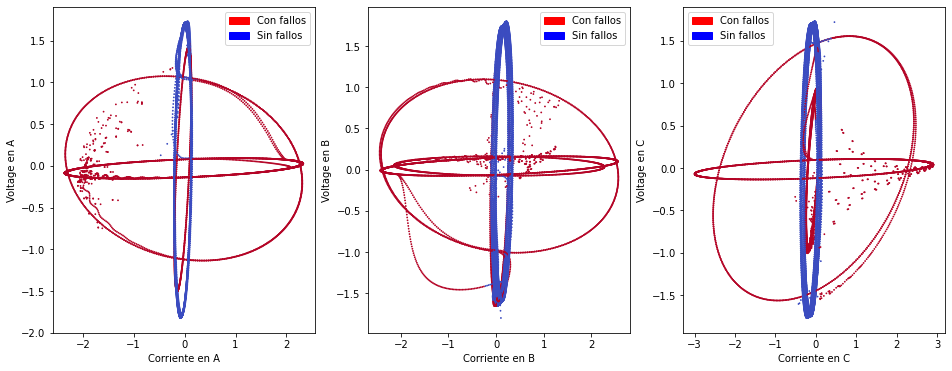

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled_standard = scaler.transform(X)

draw_volatege_per_current(X_scaled_standard, Y)

[0.28518709 0.24607331]
[0.28518709 0.5312604 ]


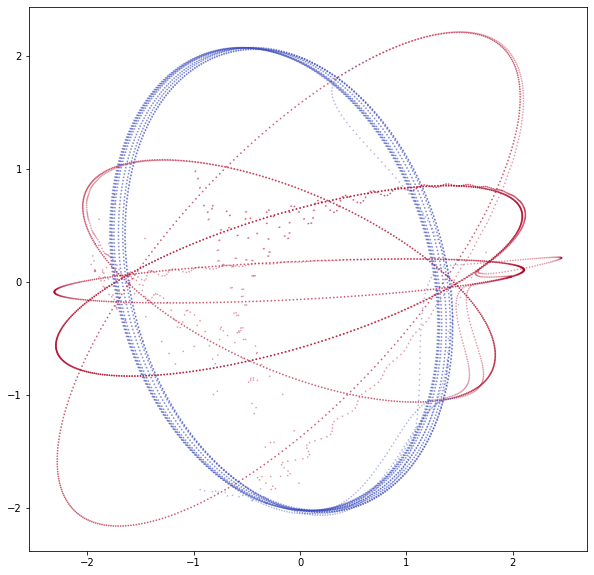

In [36]:
X_reduced_standard = reduce_dimensions(X_scaled_standard, 2)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_reduced_standard[:, 0], X_reduced_standard[:,1], c=Y,cmap=plt.cm.coolwarm, s=.6, alpha=0.3)

Este lo podemos descartar simplemente viendo la `explained_variance_ratio_` y `explained_variance_ratio_.sumcum()`, ya que perdemos casi la mitad de la información rebajando las dimensiones.

### Min Max Scaler

[0.35047398 0.33334676]
[0.35047398 0.68382074]


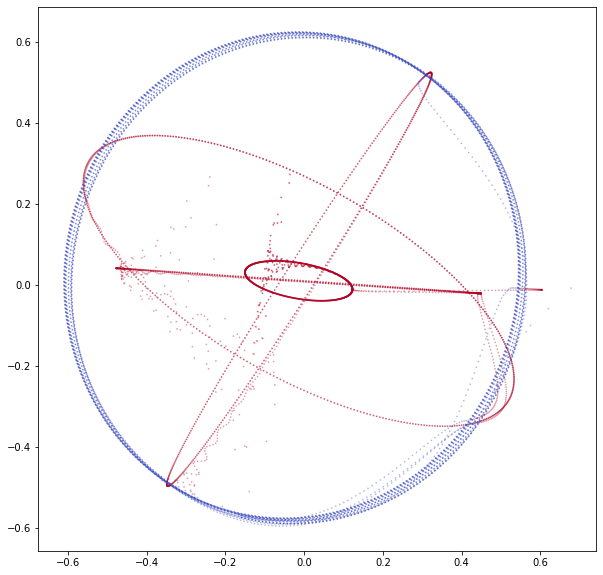

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_minmax = min_max_scaler.fit_transform(X)

X_reduced_minmax = reduce_dimensions(X_scaled_minmax, 2)


fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_reduced_minmax[:, 0], X_reduced_minmax[:,1], c=Y,cmap=plt.cm.coolwarm, s=.6, alpha=0.3)

No se pierden los datos de una forma tan drastica, pero igualmente sigue siendo notorio, de momento lo vamos a descartar.

### Default data

Vamos a rebajar las dimensiones sin realizar ningún escalado.

[0.52410748 0.41201976]
[0.52410748 0.93612724]


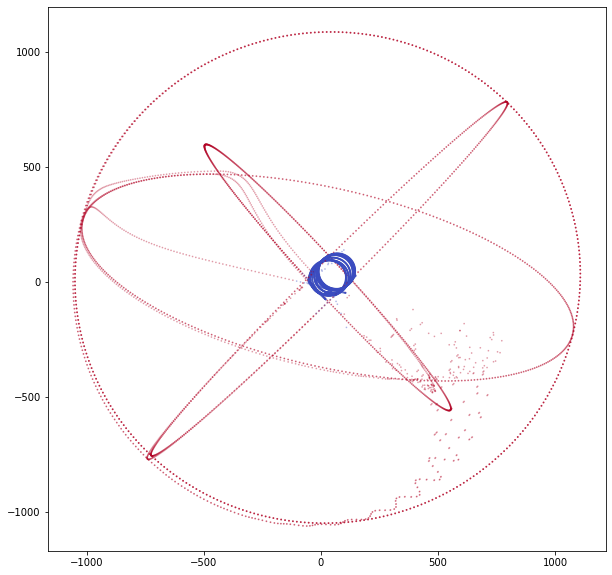

In [38]:
X_reduced_default = reduce_dimensions(X, 2)


fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_reduced_default[:, 0], X_reduced_default[:,1], c=Y,cmap=plt.cm.coolwarm, s=.6, alpha=0.3)

Apenas perdemos información, con lo cual es nuestra <b>mejor</b> opción para trabajar.

# Model selection and Crossvalidation

## K-Fold

Para la `crossvalidation` vamos a escoger el metodo de K-Fold, para asegurarnos que la puntuación de nuestro modelo no dependa de la forma en que seleccionamos nuestros datos de entrenamiento y conjunto de testeo. <br>
Estas pruebas se van a realizar con una K de valor 5.

In [39]:
def model_execution_draw(X, Y, clf):
    fig = plt.figure(figsize=(10,10), dpi = 400)
    XY = np.concatenate((np.array([Y]).T, X), axis = 1)
    ones = XY[XY[:, 0]==1]
    zeros = XY[XY[:, 0]==0]
    plt.scatter(ones[:,1],ones[:,2], marker='.')
    plt.scatter(zeros[:,1],zeros[:,2], c= 'green', marker='.')
    x = XY[:,1:]
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='r')
    return clf

In [40]:
from sklearn.metrics import  precision_recall_curve, average_precision_score, roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import time


def compute_corossvalidation(X, Y, n, clf):
    target_names = ['Sin falla', 'Con falla']
    kf = KFold(n_splits = n)
    for train, test in kf.split(X):
        start_time = time.time()
        clf.fit(X[train], Y[train])
        print("---Fit ha tardado %s segundos ---" % (time.time() - start_time))
        probs = clf.predict_proba(X[test])
        predicted_y = clf.predict(X[test])        
        model_execution_draw(X[test], Y[test], clf)

        precision = {}
        recall = {}
        average_precision = {}
        plt.figure()
        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(Y[test] == i, probs[:, i])
            average_precision[i] = average_precision_score(Y[test] == i, probs[:, i])

            plt.plot(recall[i], precision[i],
            label='Precision-recall curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, average_precision[i]))
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend(loc="upper right")


        # Compute ROC curve and ROC area for each class
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(Y[test] == i, probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        # Plot ROC curve
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
        plt.legend()
        
        cm = confusion_matrix(Y[test], predicted_y, labels=clf.classes_)
        ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
        
        print(classification_report(Y[test],predicted_y,target_names=target_names))

### SVC con Polynomial kernel

---Fit ha tardado 0.9104588031768799 segundos ---
              precision    recall  f1-score   support

   Sin falla       0.85      1.00      0.92      1272
   Con falla       1.00      0.81      0.89      1129

    accuracy                           0.91      2401
   macro avg       0.93      0.90      0.91      2401
weighted avg       0.92      0.91      0.91      2401

---Fit ha tardado 1.221109390258789 segundos ---
              precision    recall  f1-score   support

   Sin falla       0.94      1.00      0.97       992
   Con falla       1.00      0.95      0.98      1408

    accuracy                           0.97      2400
   macro avg       0.97      0.98      0.97      2400
weighted avg       0.97      0.97      0.97      2400

---Fit ha tardado 1.0117828845977783 segundos ---
              precision    recall  f1-score   support

   Sin falla       0.90      1.00      0.95       972
   Con falla       1.00      0.92      0.96      1428

    accuracy                     

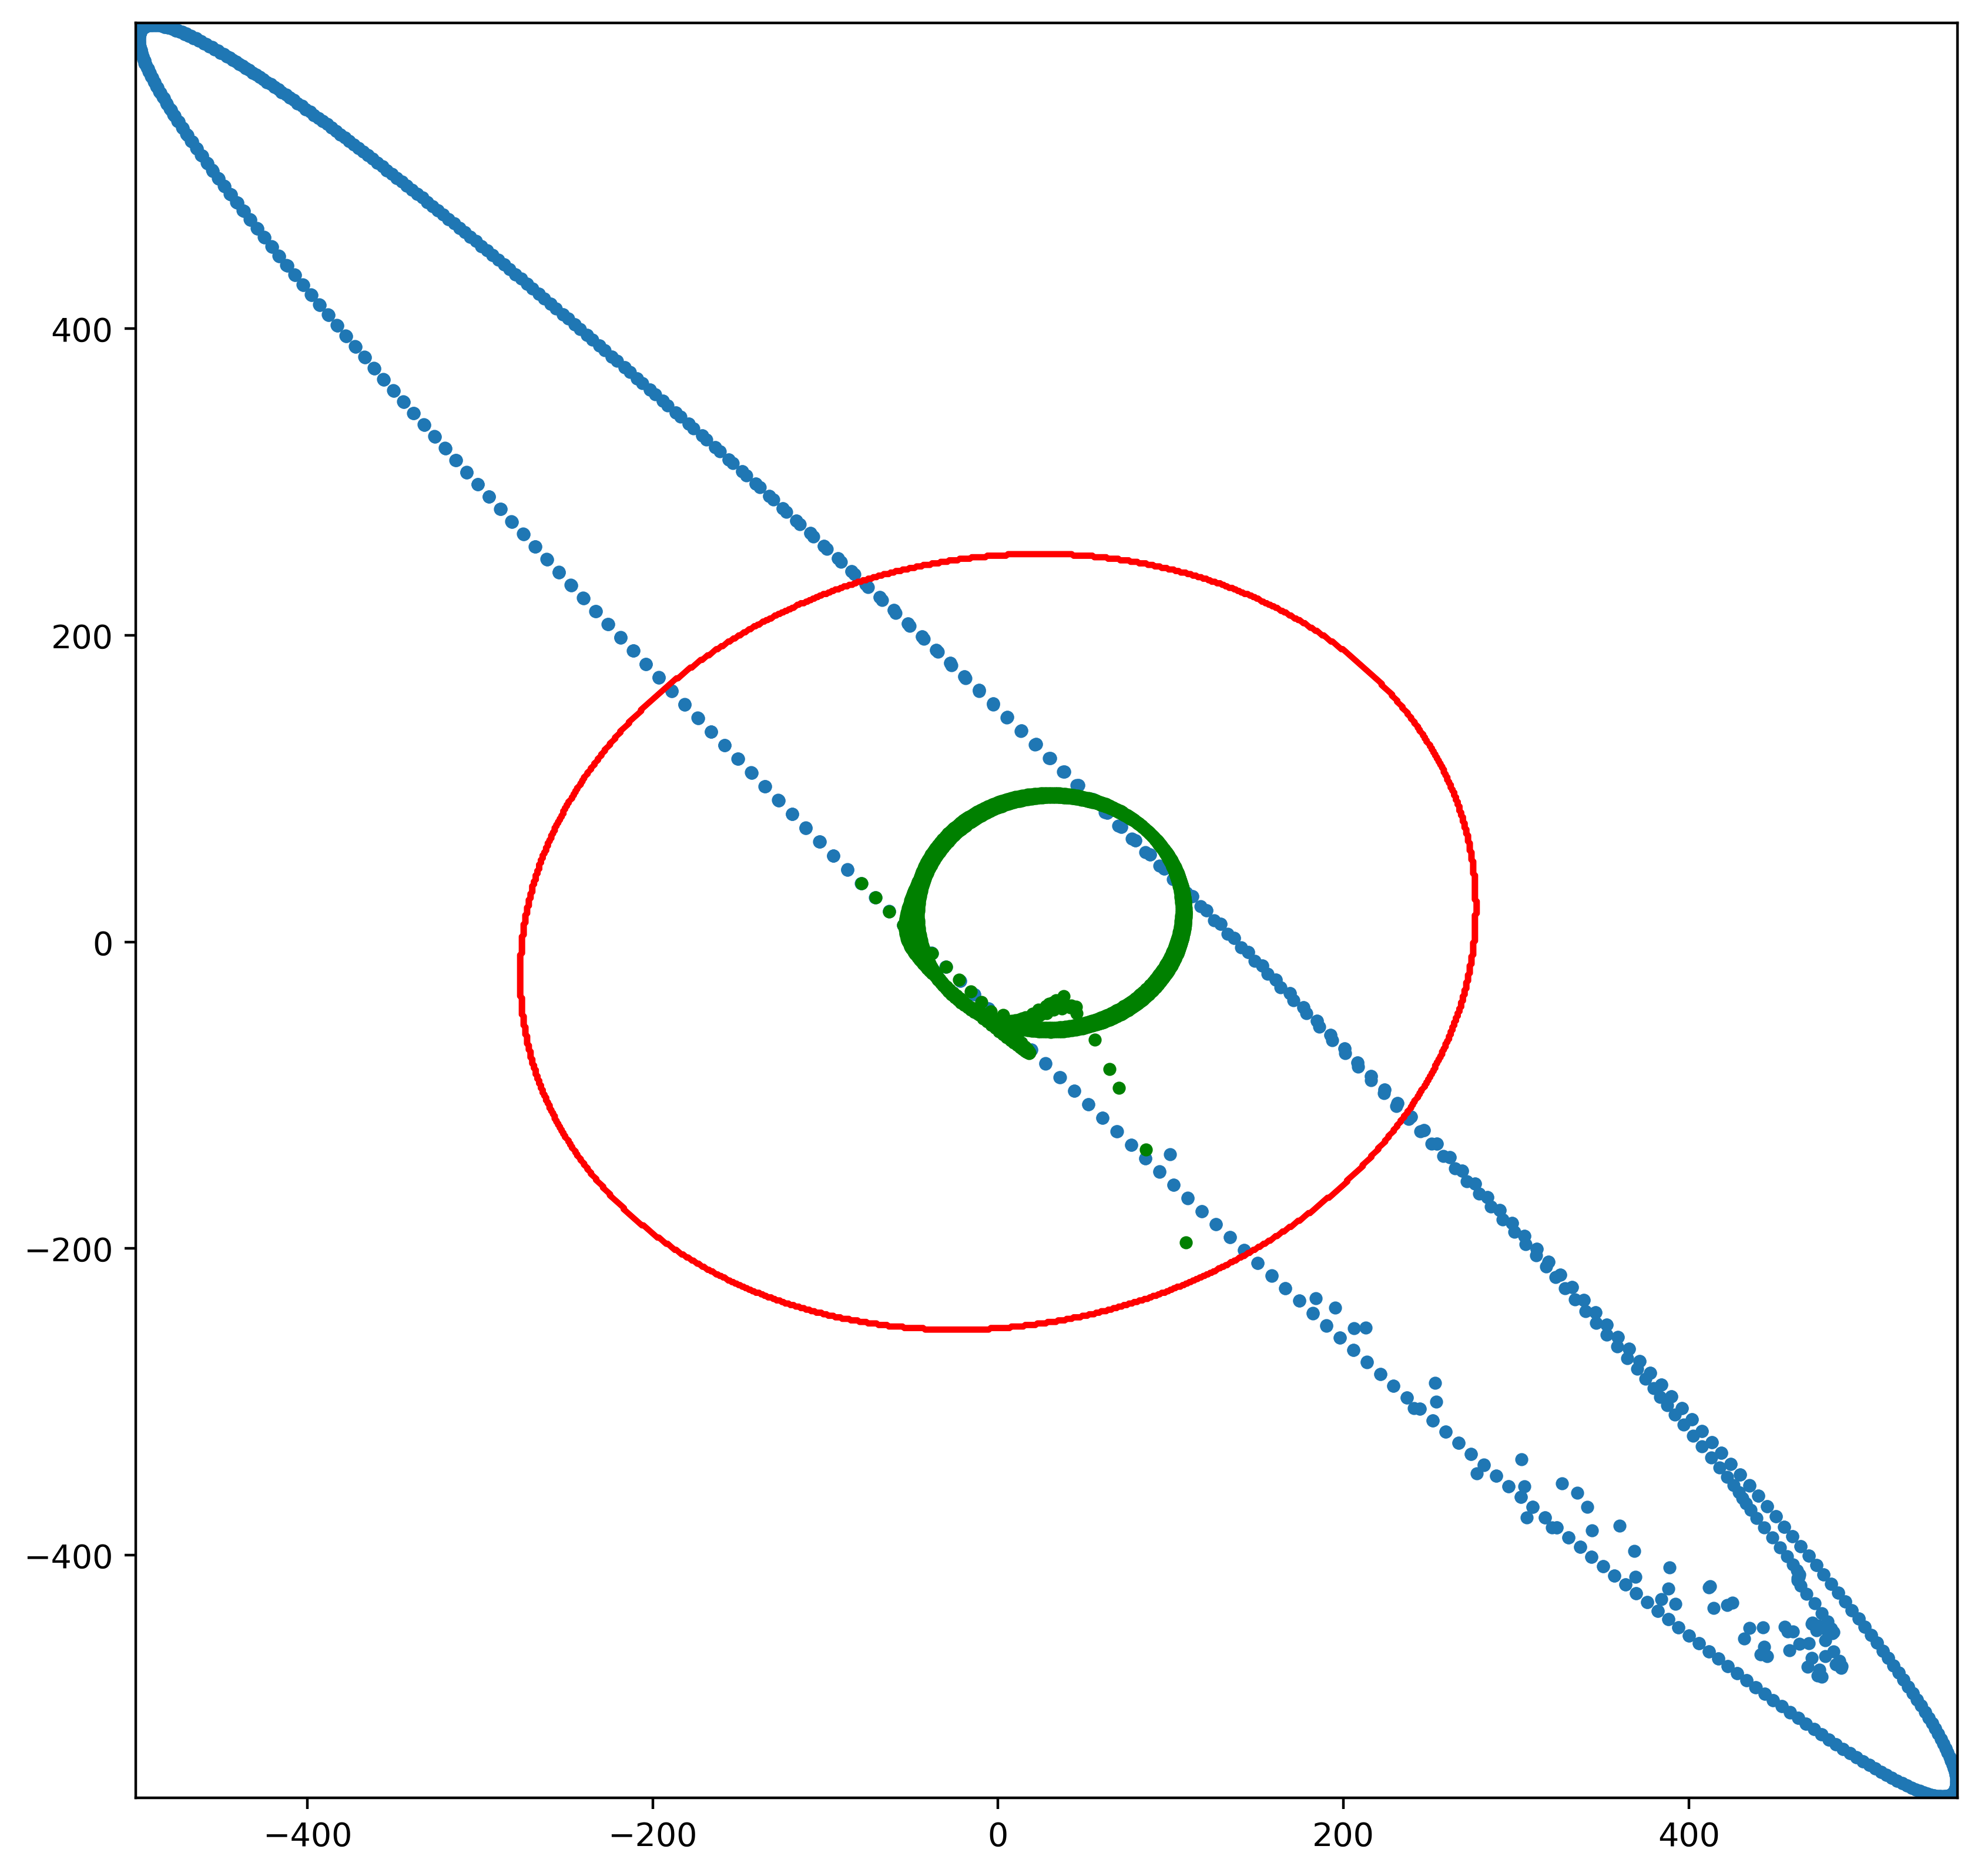

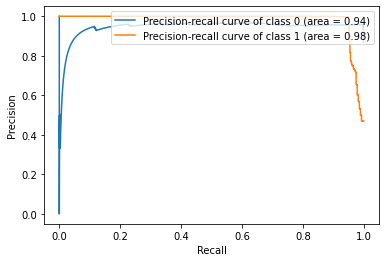

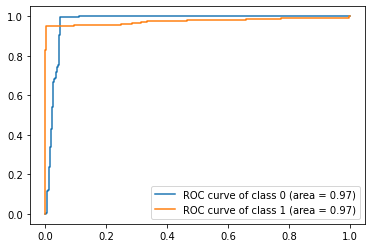

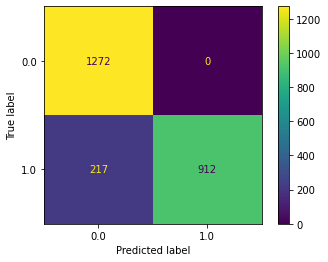

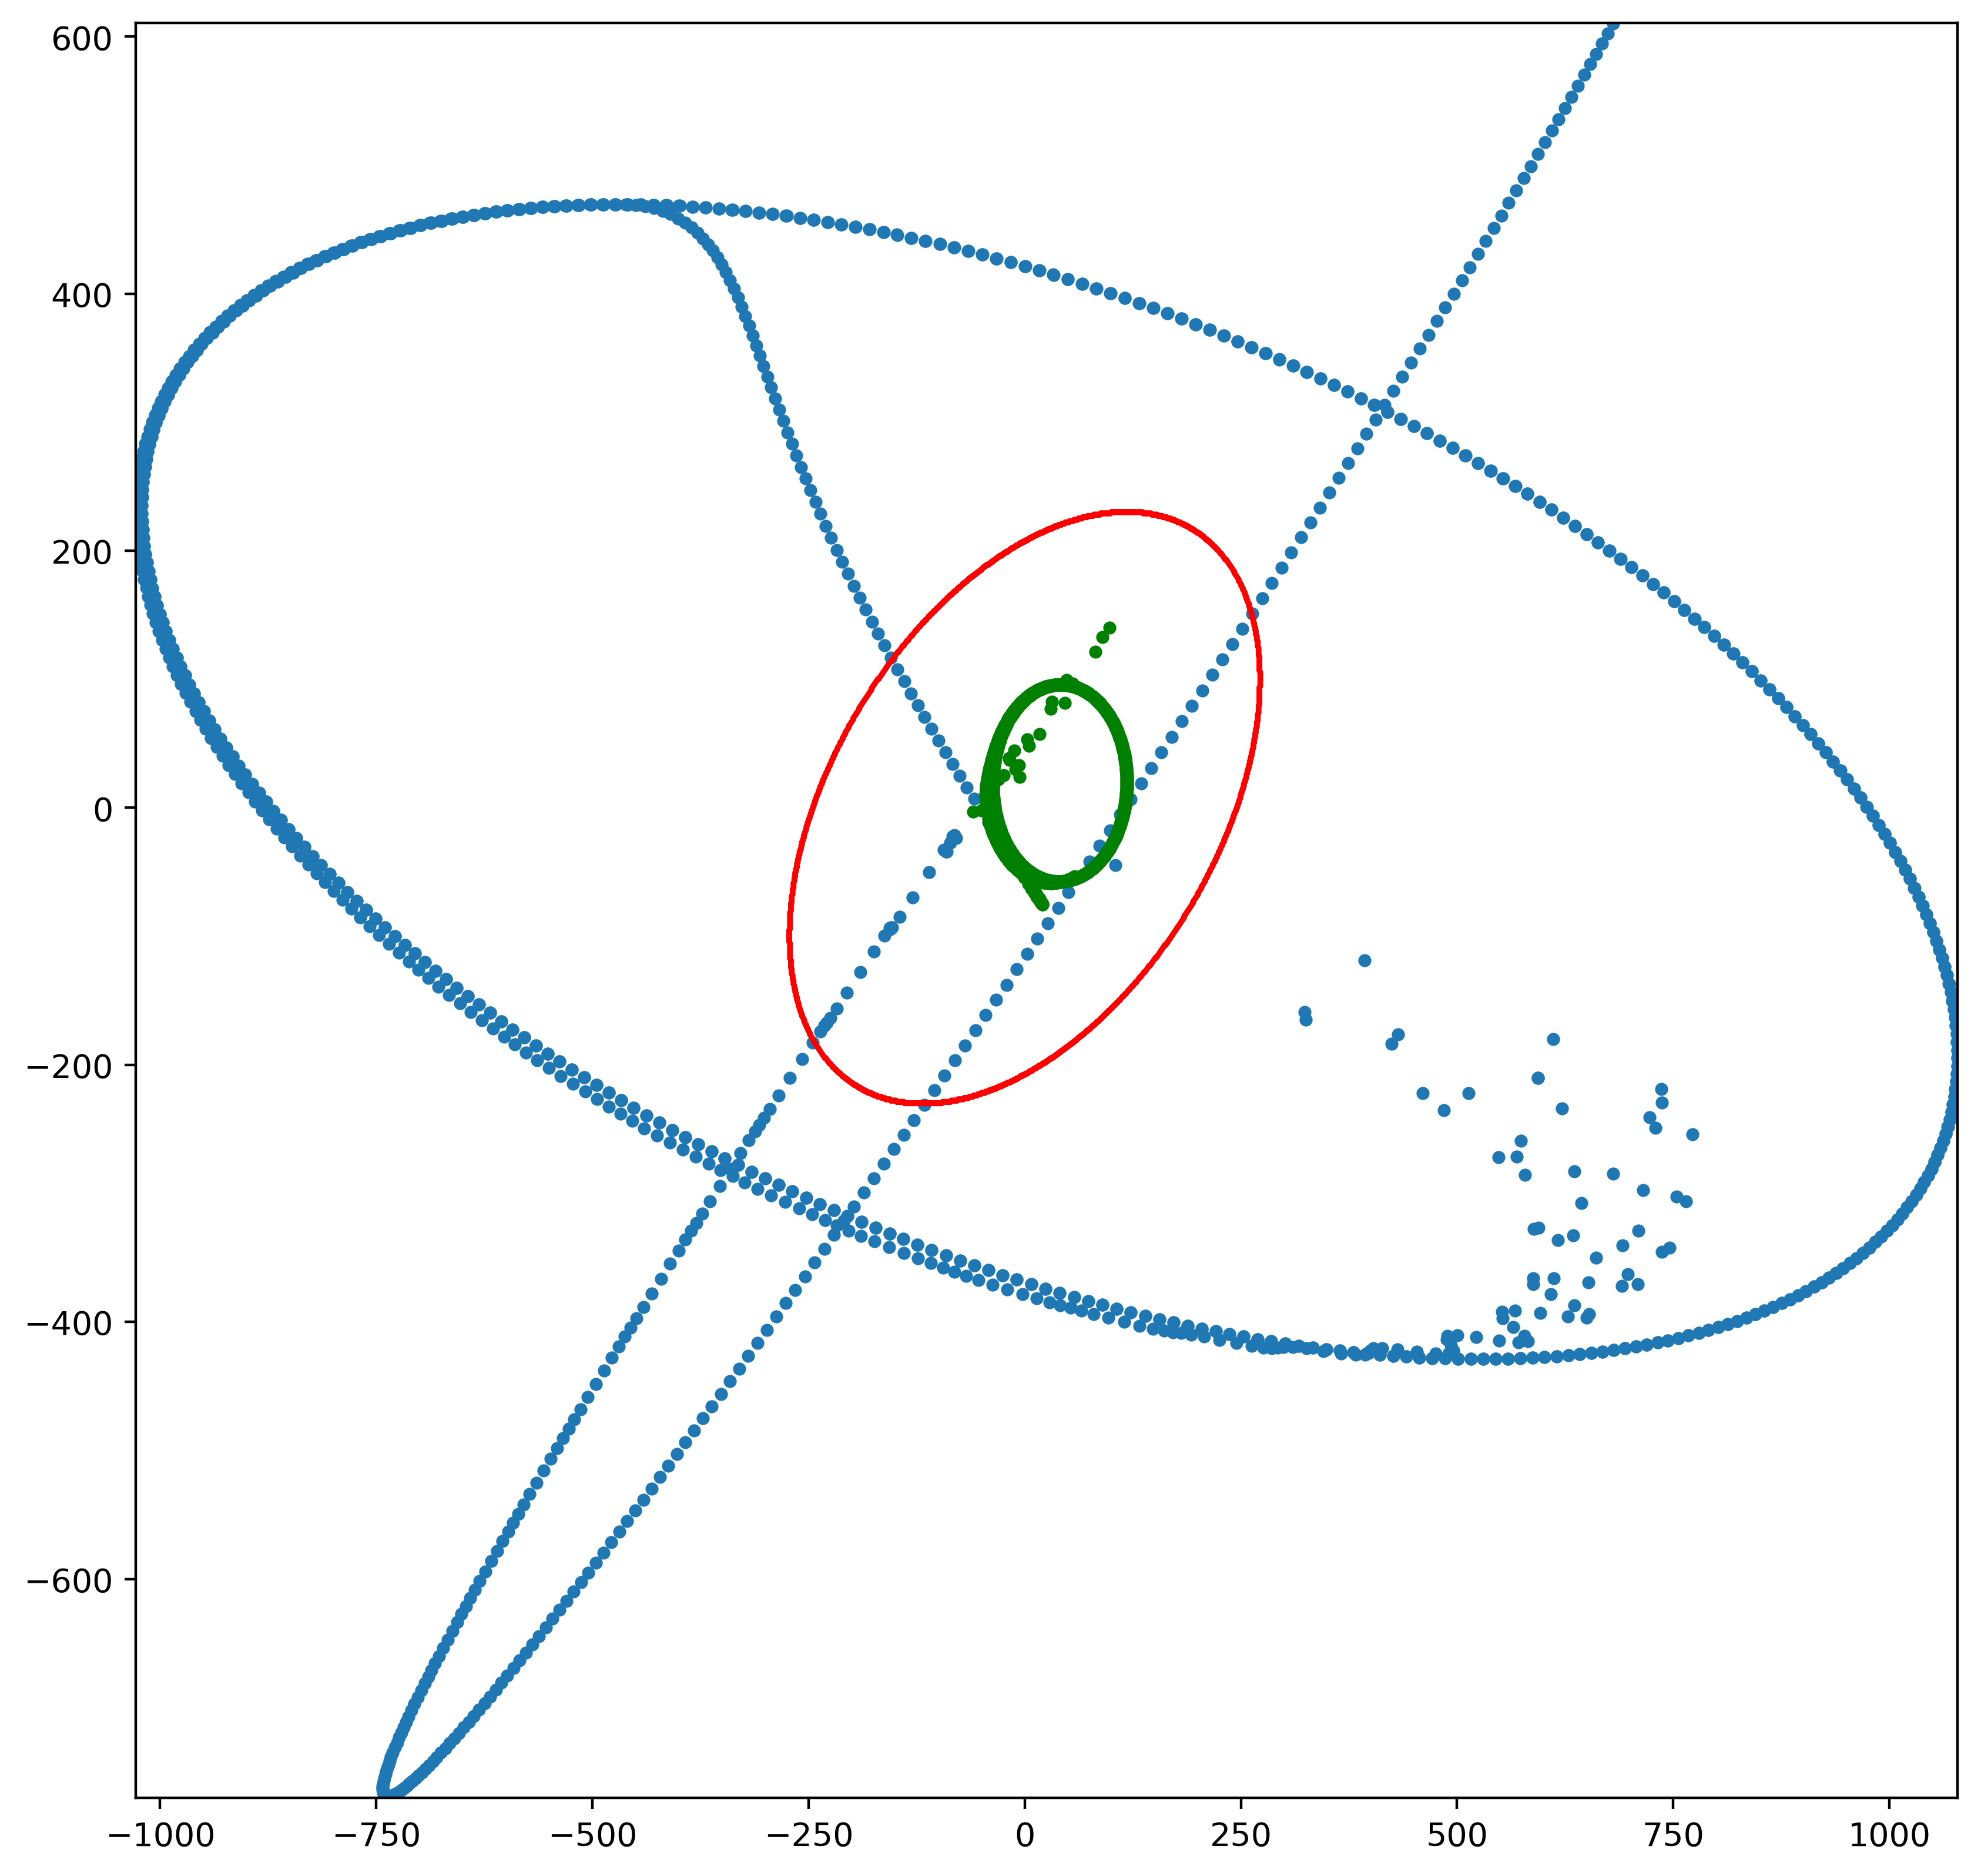

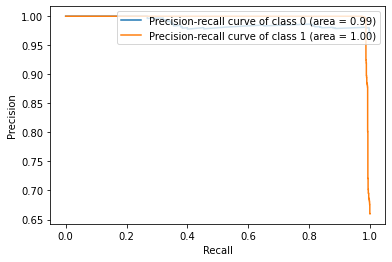

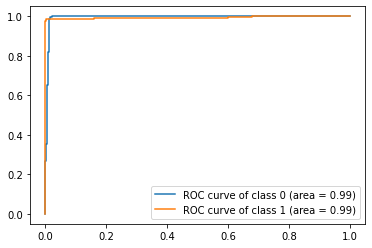

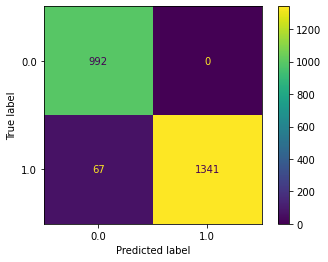

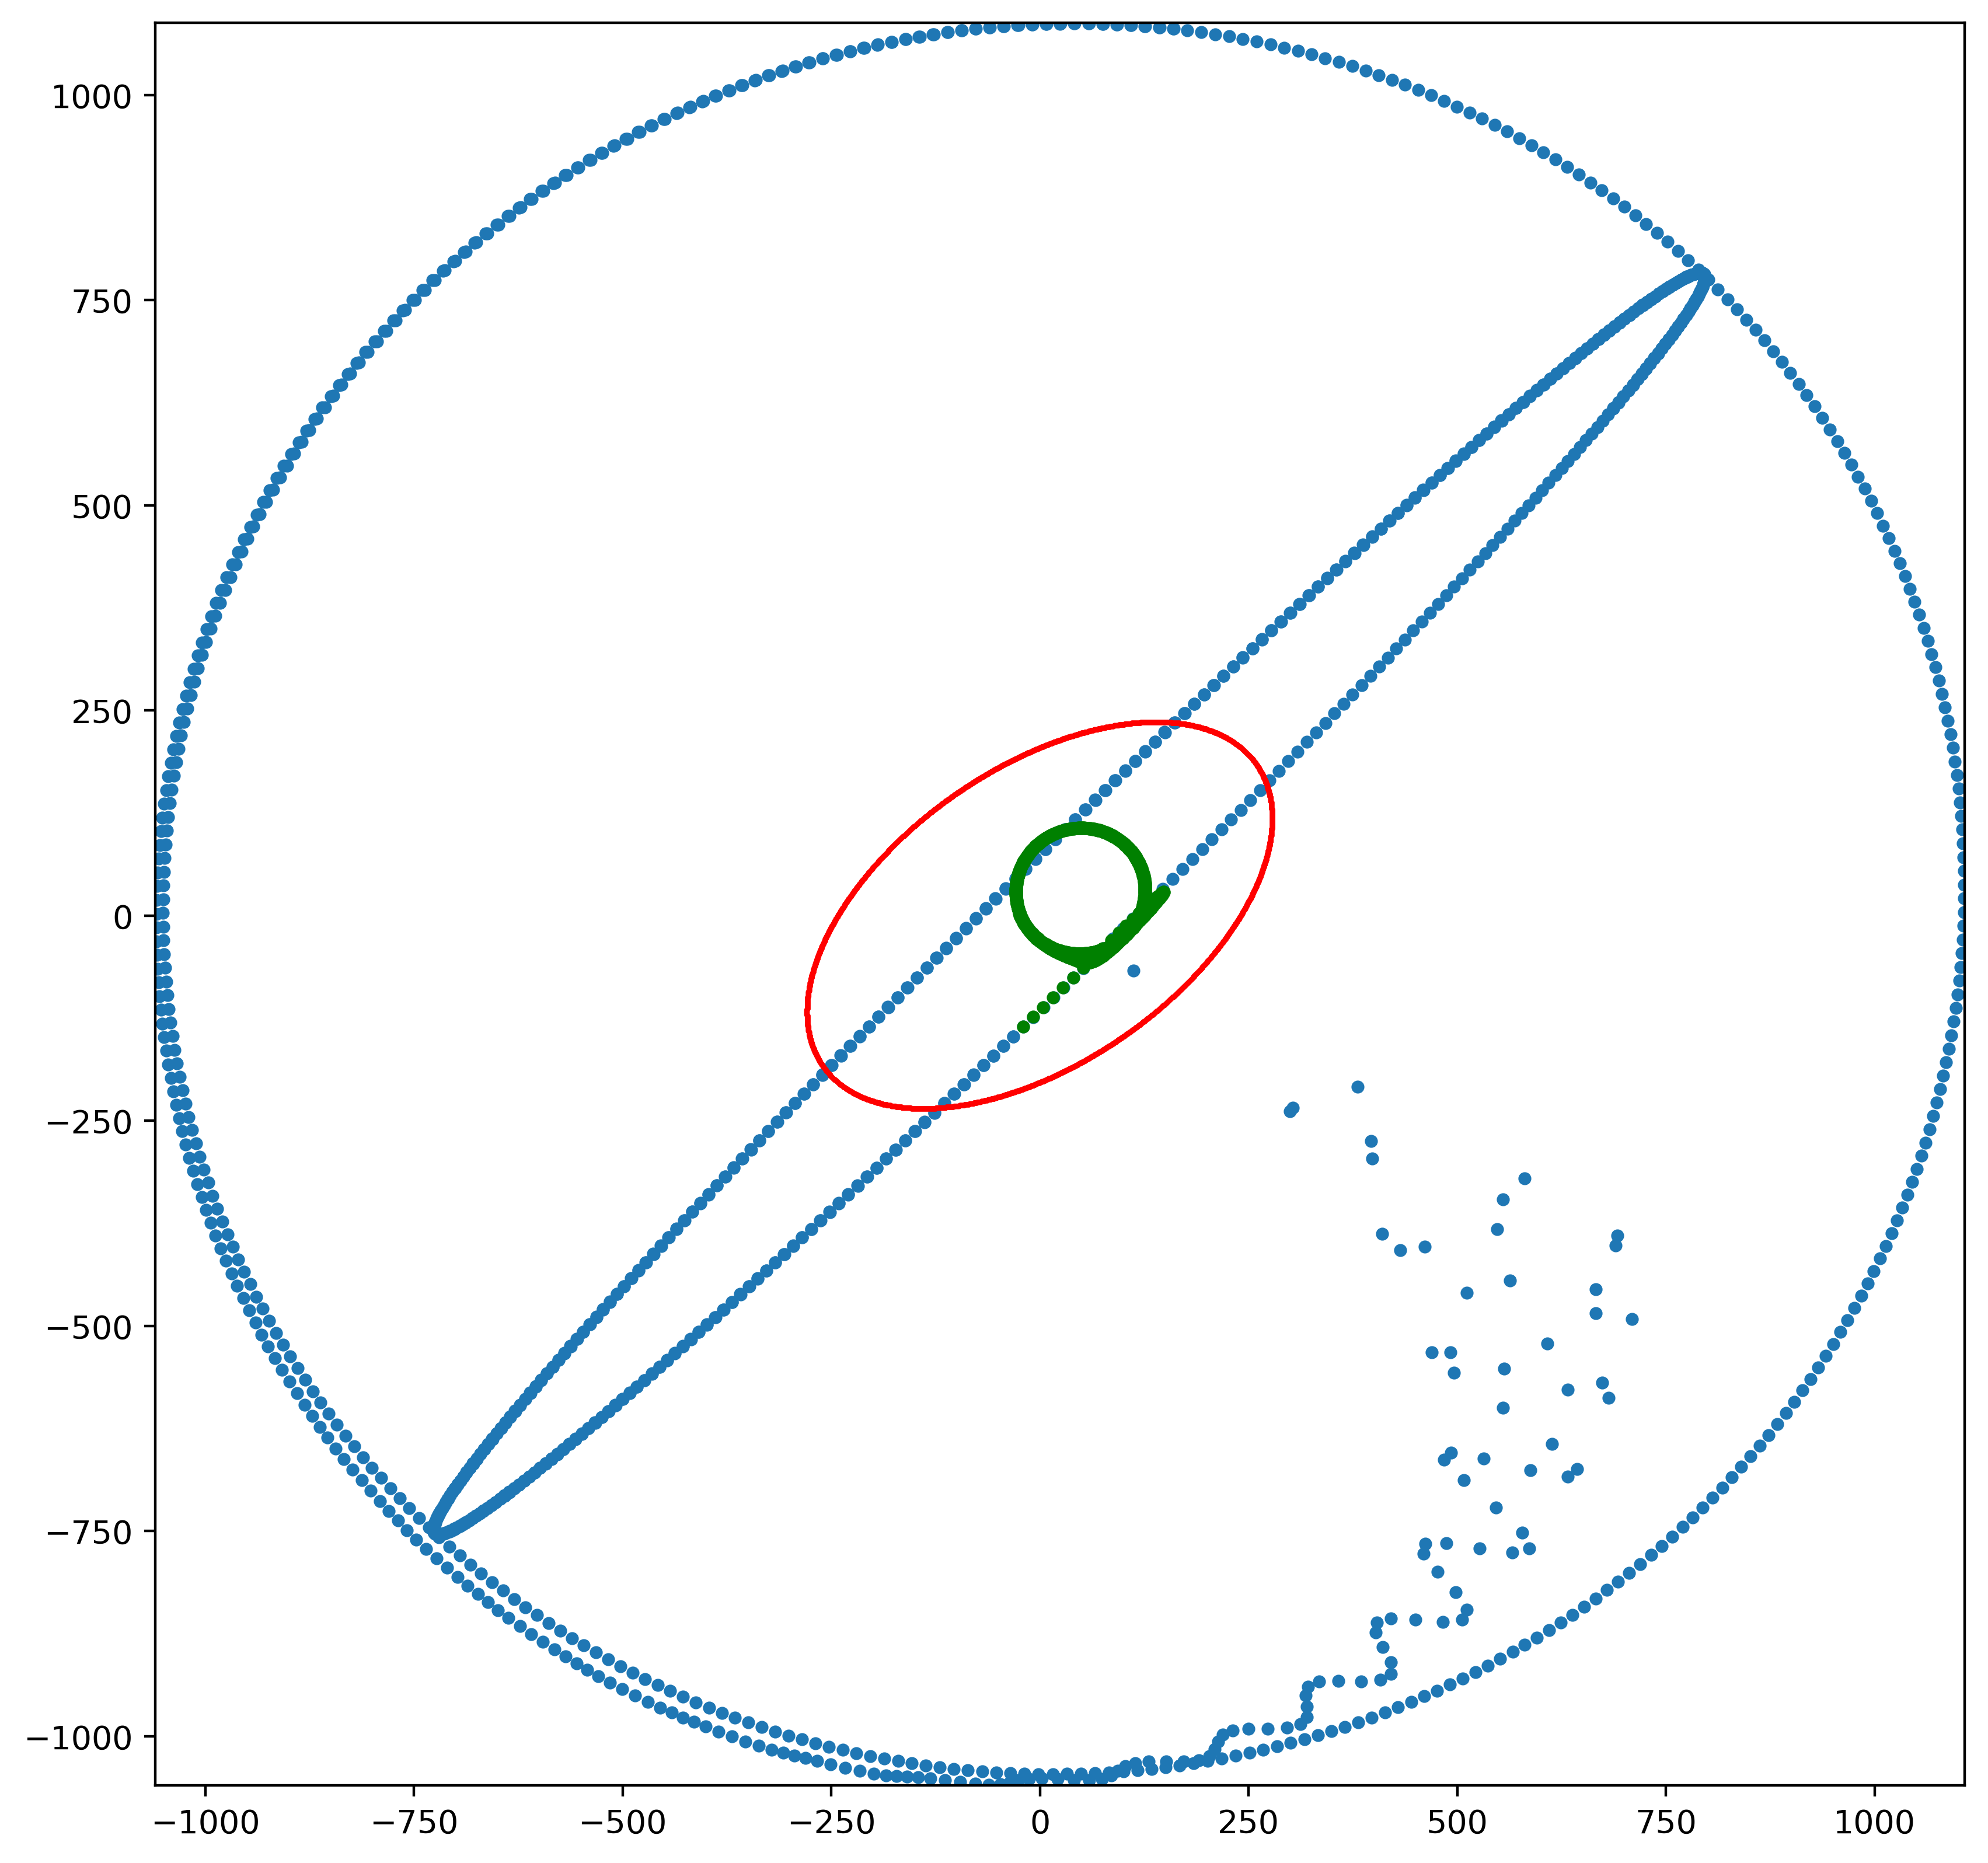

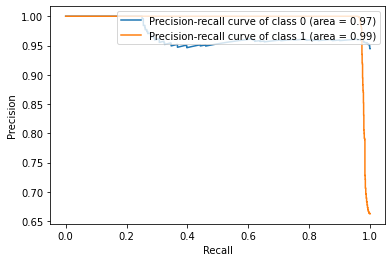

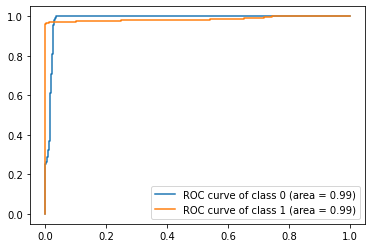

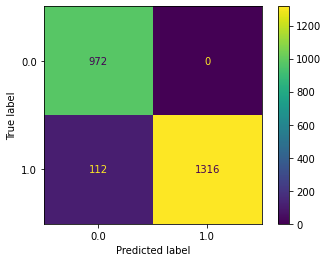

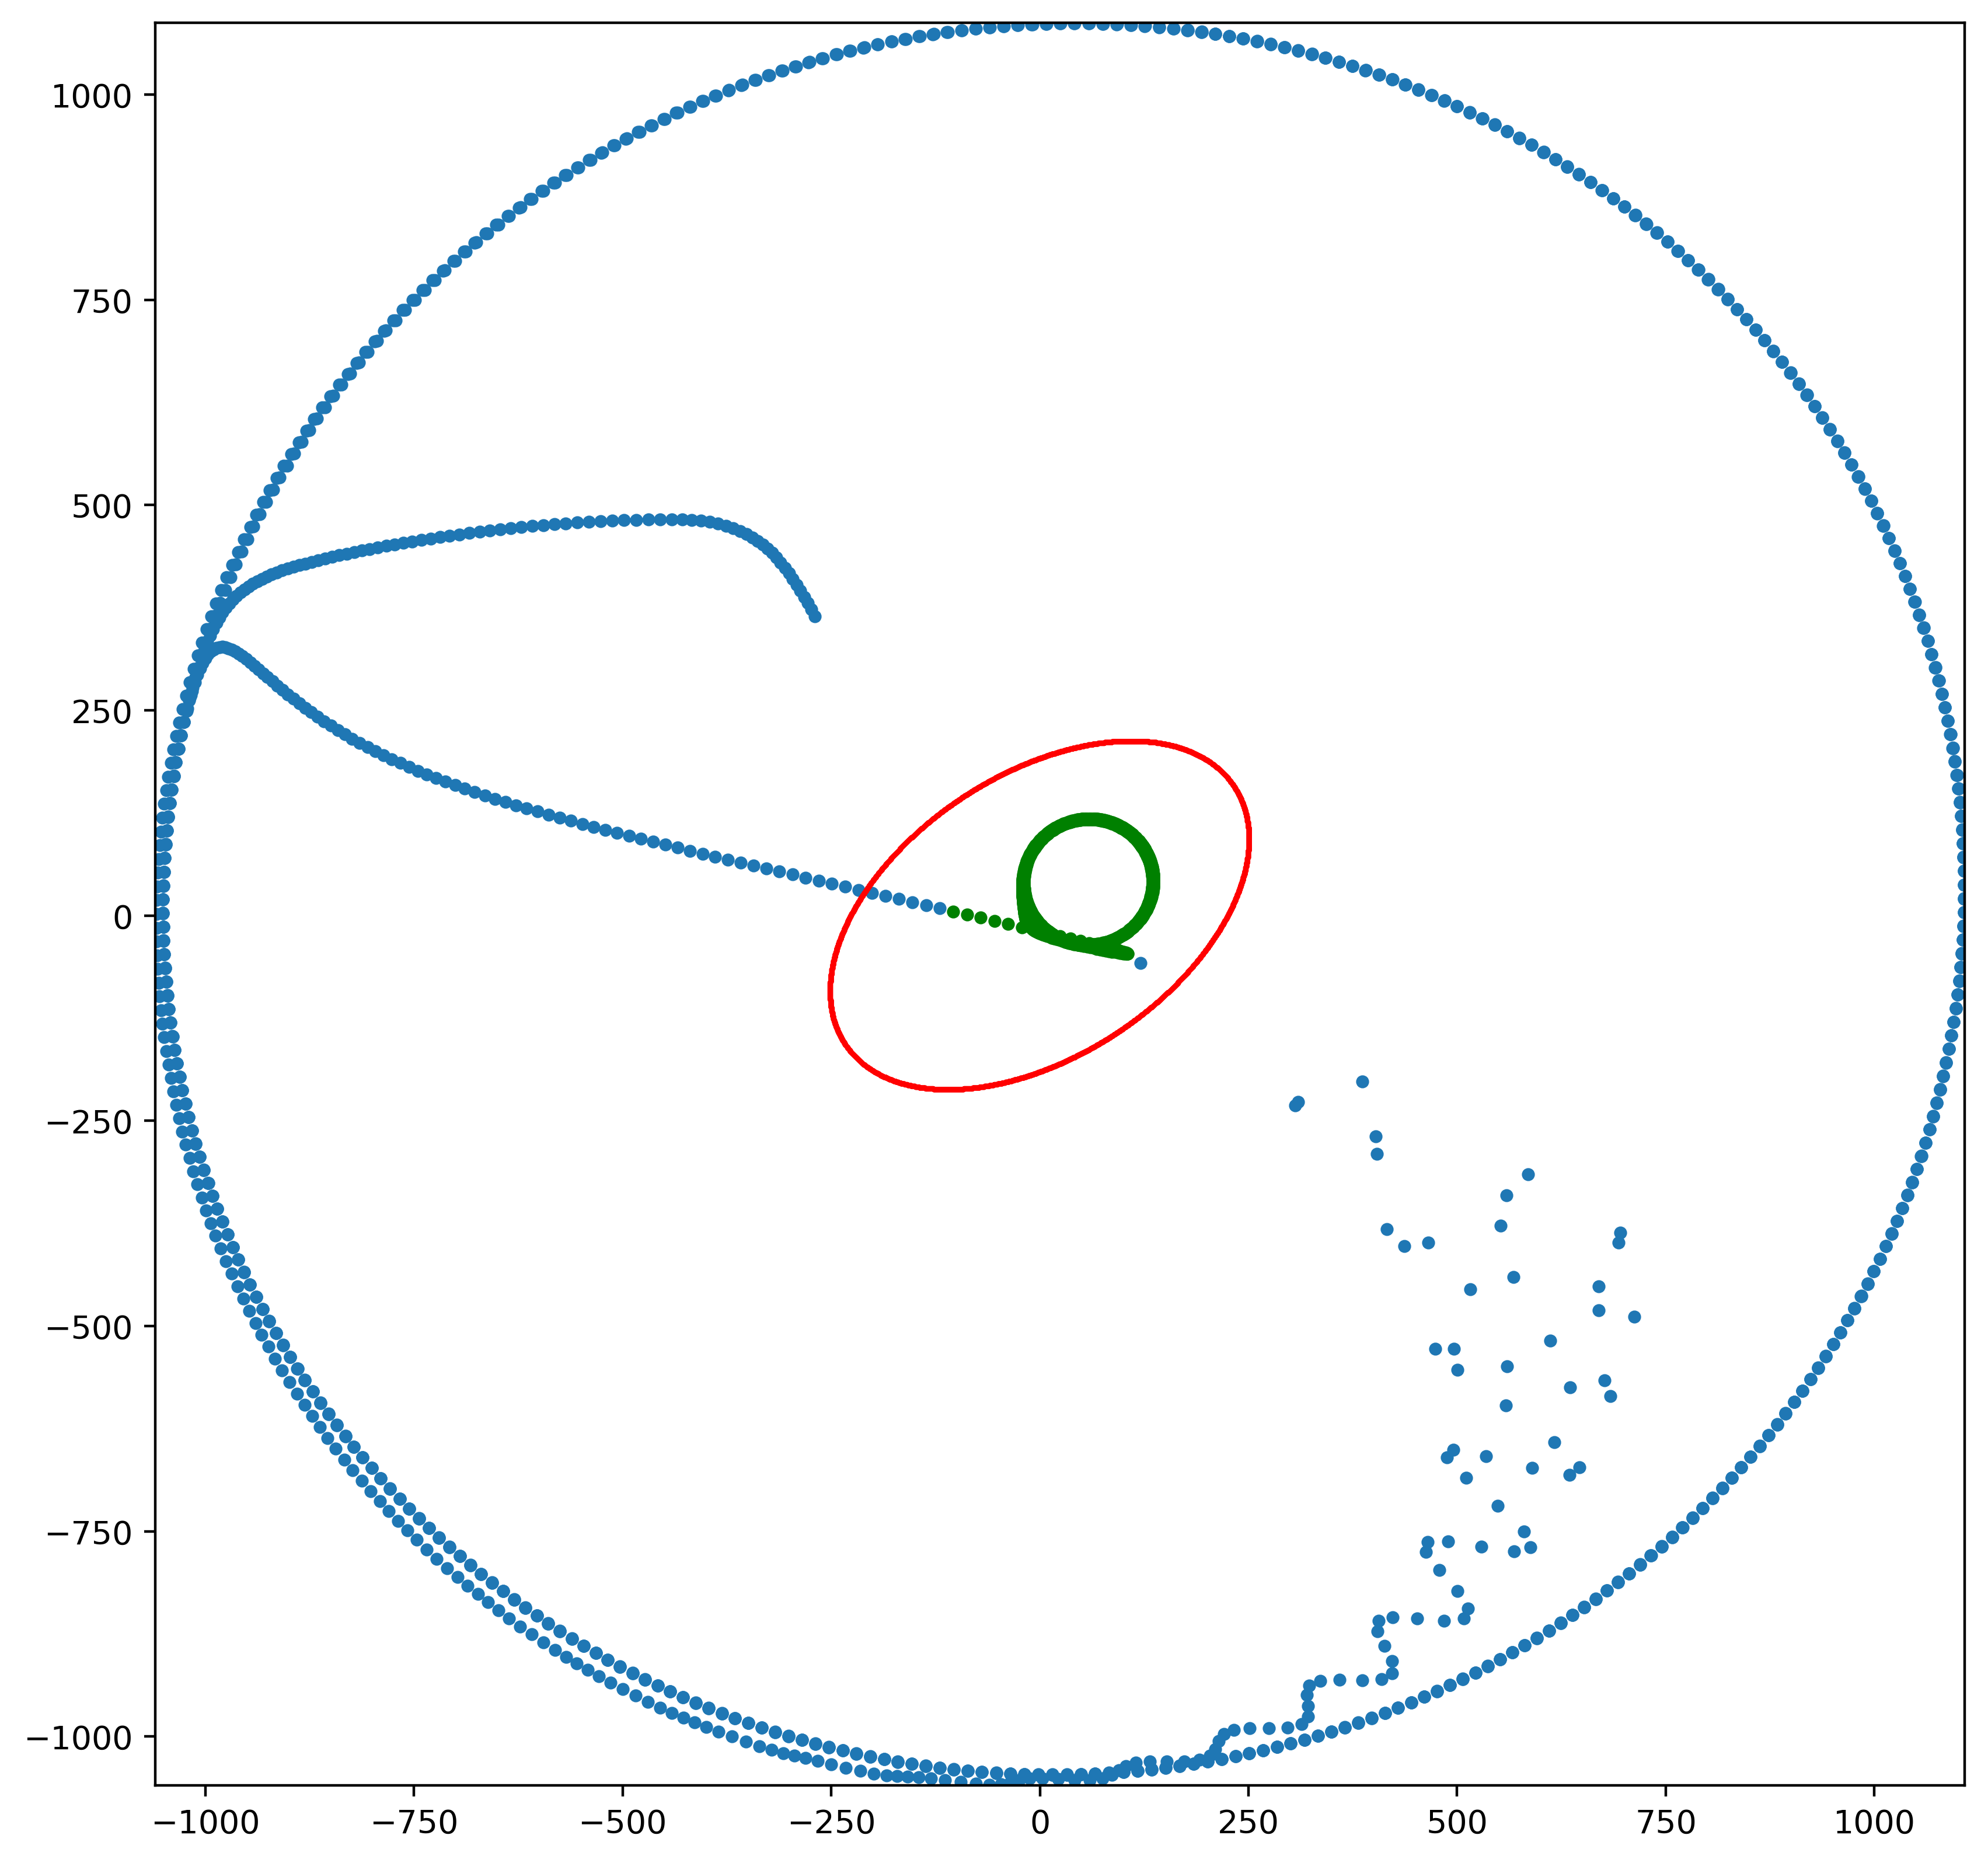

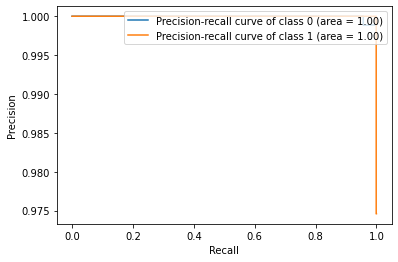

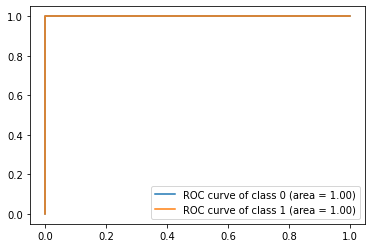

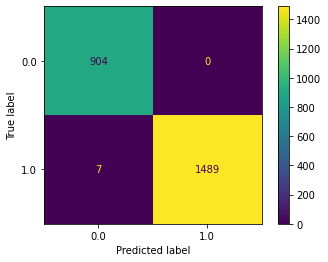

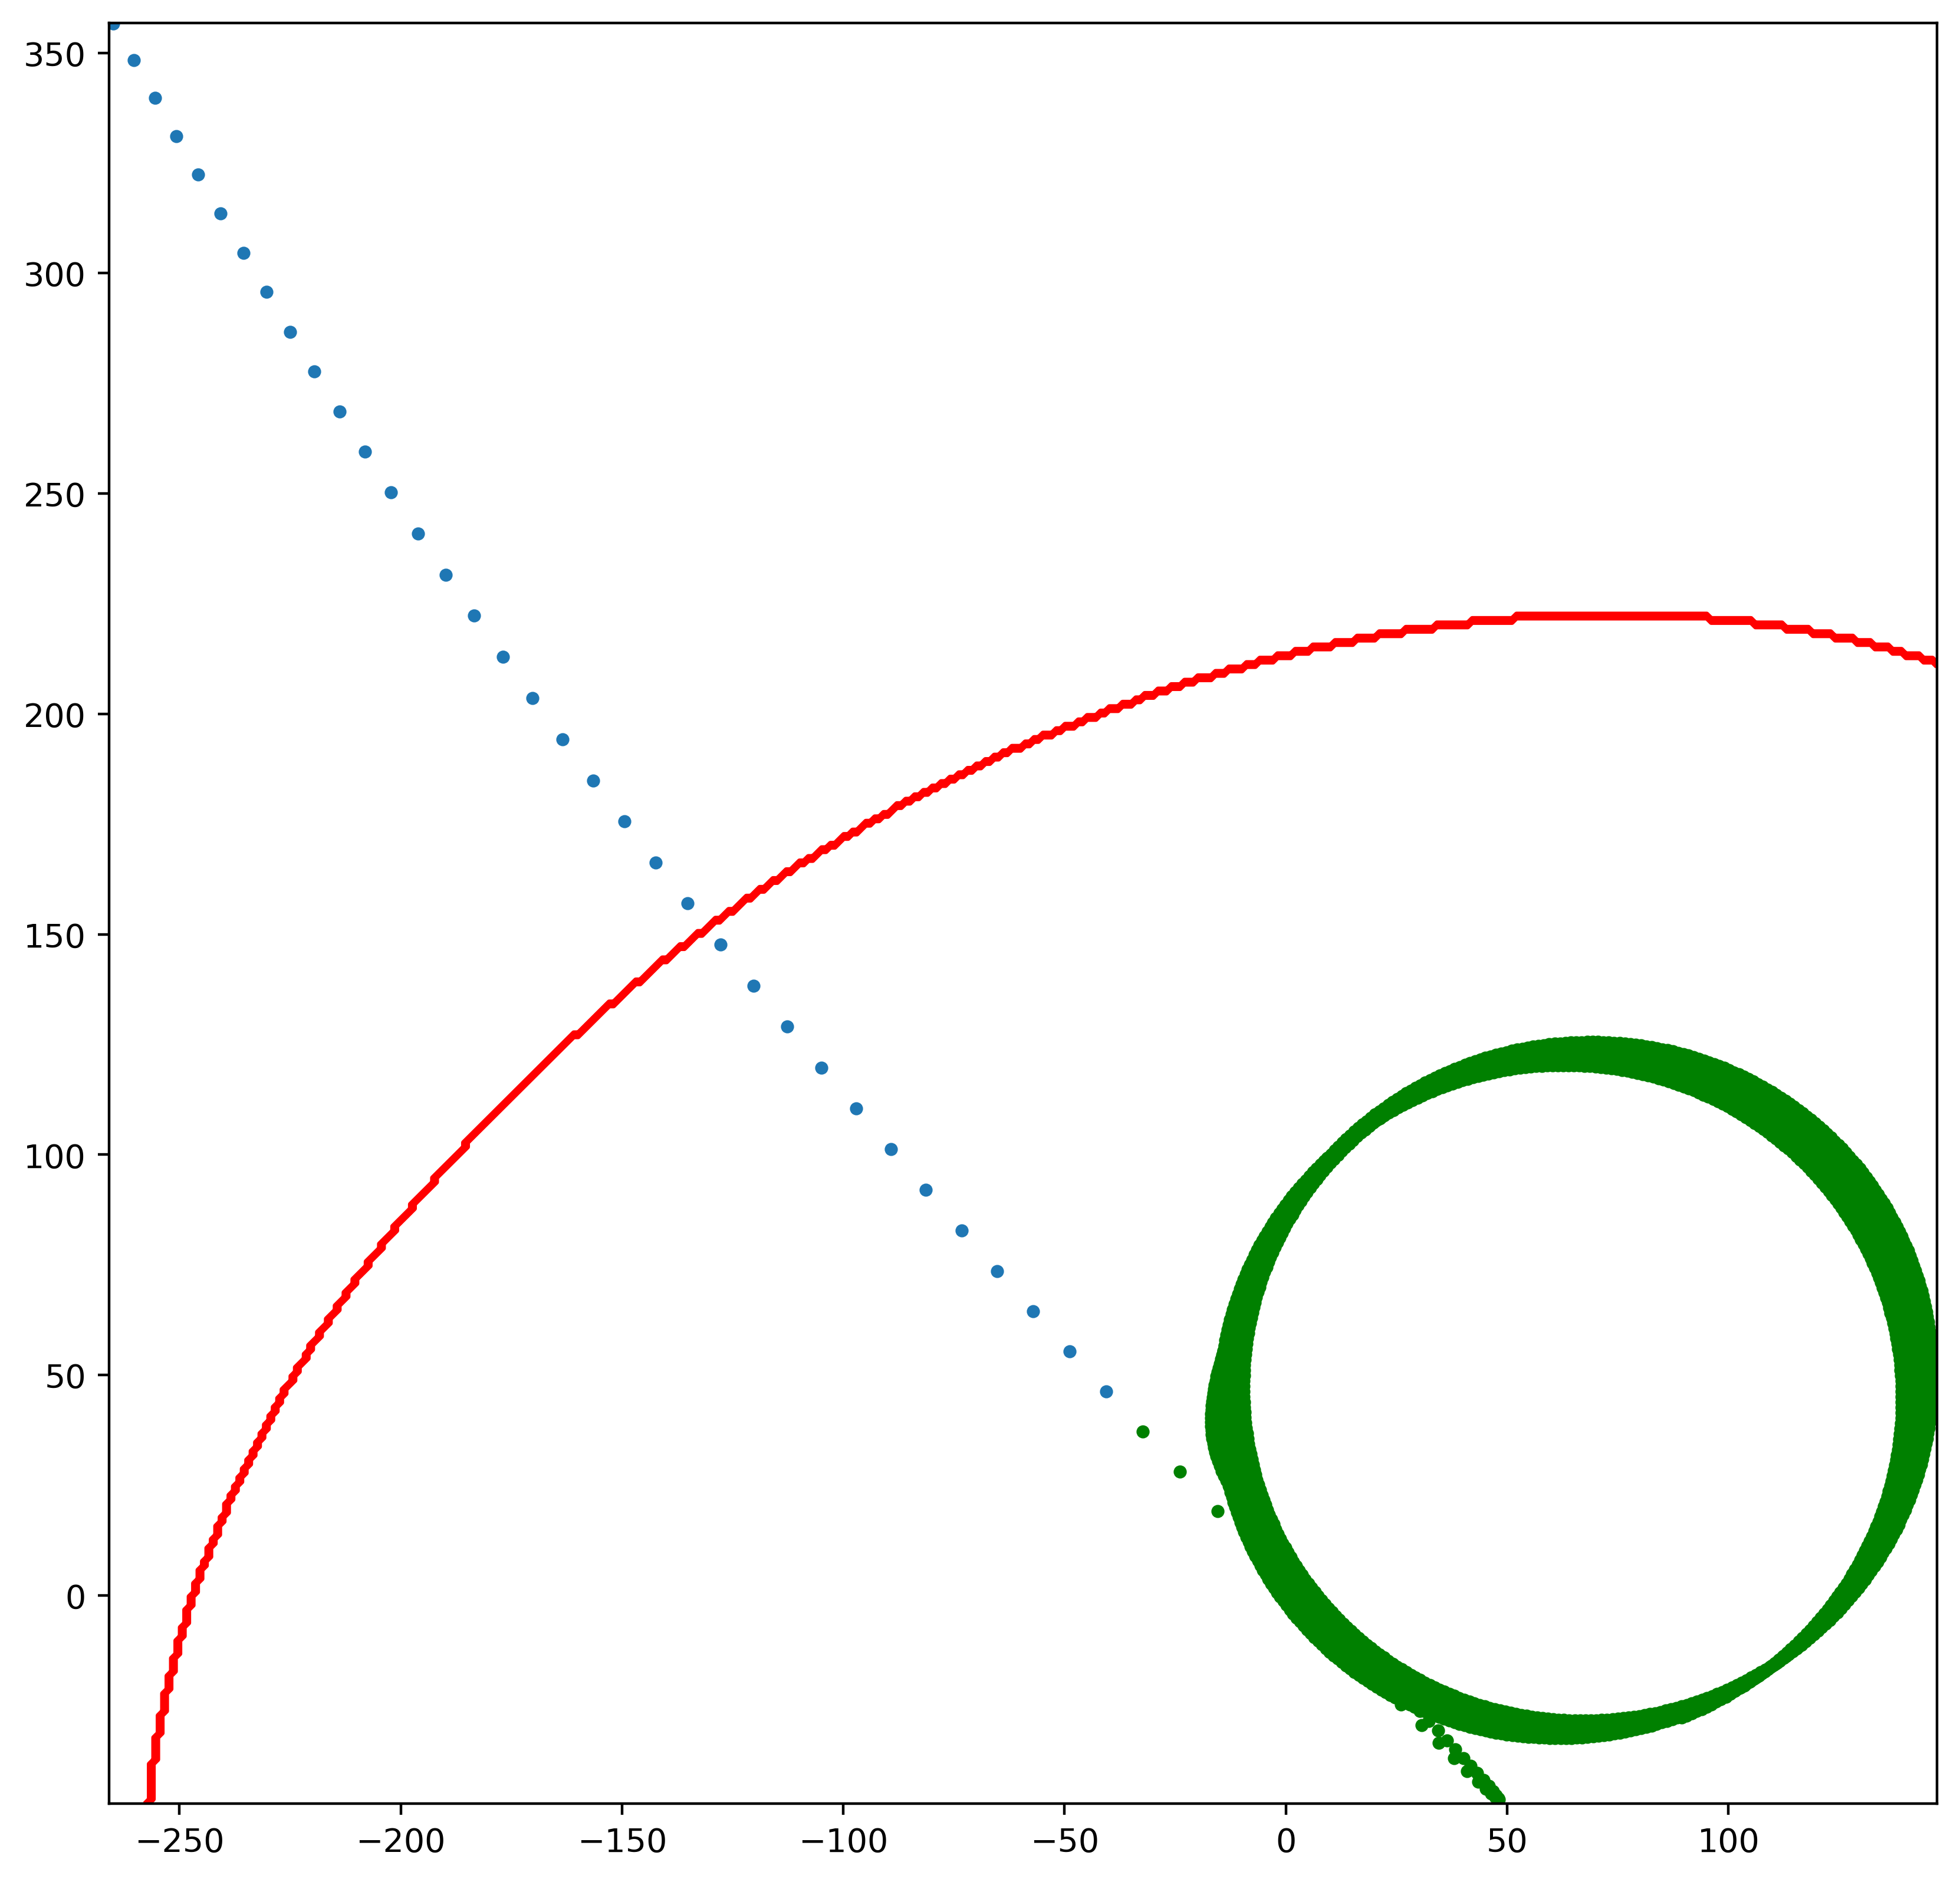

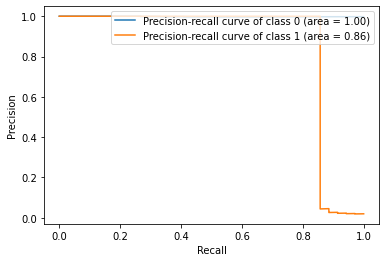

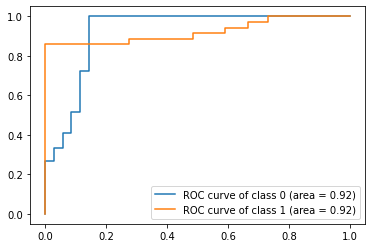

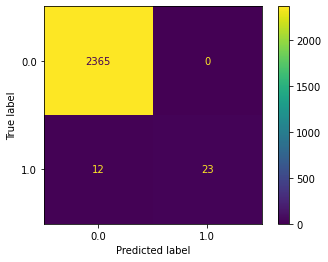

In [41]:
from sklearn.svm import SVC
clf = SVC(probability=True, kernel = 'poly', degree=2)
compute_corossvalidation(X_reduced_default, Y, 5, clf)

### SVC con RBF kernel

In [ ]:
clf = SVC(probability=True, kernel = 'rbf')
compute_corossvalidation(X_reduced_default, Y, 5, clf)

---Fit ha tardado 0.7372193336486816 segundos ---
              precision    recall  f1-score   support

   Sin falla       0.88      1.00      0.94      1272
   Con falla       1.00      0.85      0.92      1129

    accuracy                           0.93      2401
   macro avg       0.94      0.92      0.93      2401
weighted avg       0.94      0.93      0.93      2401

---Fit ha tardado 1.1107192039489746 segundos ---
              precision    recall  f1-score   support

   Sin falla       0.96      1.00      0.98       992
   Con falla       1.00      0.97      0.99      1408

    accuracy                           0.98      2400
   macro avg       0.98      0.99      0.98      2400
weighted avg       0.99      0.98      0.99      2400

---Fit ha tardado 0.9443490505218506 segundos ---


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
compute_corossvalidation(X_reduced_default, Y, 5, clf)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
compute_corossvalidation(X_reduced_default, Y, 5, clf)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
compute_corossvalidation(X_reduced_default, Y, 4, clf)

### Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
compute_corossvalidation(X_reduced_default, Y, 4, clf)


# Conclusión

Según los resultados que hemos visto en el anterior apartado, los mejores modelos para predecir dicho problema, cuando un sistema electrónica puede sufrir un fallo según las fuentes de energía y la corriente por cada línea serían:<br> 
Utilizando un modelo clasificador de <b>Máquinas de vectores de soporte</b> con el kernel `RBF`, o una <b>red neuronal</b>. <br>
Y como un clasificador que no haya aportado ningún resultado relevante, sería el regresor logístico, ya que como se puede ver apreciar esta clasificando todo de una forma incorrecta. <br>
Además con la `ConfusionMatrixDisplay` podemos ver los como los false positives y false negatives, para entender mucho mejor como de bien está trabajando el clasificador.